# Set up the environment
The software we will use includes:
- Gmsh -- https://gmsh.info: for defining our detector geometry and creating a finite element mesh
- Elmer -- http://www.elmerfem.org: for solving for the electrostatic fields
- ROOT -- https://root.cern.ch: a prerequisite for Garfield++ (with Python enabled). Note that for this example a version of ROOT has been compiled with Python 3.
- Garfield++ -- https://garfieldpp.web.cern.ch/garfieldpp: for detector simulation

The entire development environment has already been prepared to run the code in this notebook on Google Colab and will be downloaded directly below. This setup is documented in another notebook:

https://colab.research.google.com/github/jerenner/garfieldfem/blob/master/garfield_FEM_install.ipynb

It can be followed to perform a similar installation on a local machine.

**Get the pre-compiled binaries and setup environment**

In [1]:
!wget -q https://raw.githubusercontent.com/swieca22/swieca22/master/setup.py
import setup
setup.install_packages()

Unpacking...
Installing dependencies....
Welcome to JupyROOT 6.22/08


In [9]:
import ROOT
import ctypes

In [10]:
# Set up the gas medium.
gas = ROOT.Garfield.MediumMagboltz()
gas.SetTemperature(293.15)
gas.SetPressure(740.)
gas.SetComposition("ar", 70., "co2", 30.)
gas.EnableDrift()

MediumMagboltz::SetComposition:
    Ar/CO2 (70/30)


In [11]:
 #Create a cylinder in which the x-rays can convert. Diameter [cm]
diameter = 7.8;

#Half-length of the cylinder [cm].

length = 10.;

tube = ROOT.Garfield.SolidTube(0, 0, 0, 0.5 * diameter, length);

#Combine gas and box to a simple geometry.
geo = ROOT.Garfield.GeometrySimple();
geo.AddSolid(tube, gas);

In [12]:
 #Make a component with constant electric field.
 field = ROOT.Garfield.ComponentConstant();
 field.SetGeometry(geo);
 field.SetElectricField(0., 0., 500.); 

In [13]:
#Make a sensor.
sensor = ROOT.Garfield.Sensor();
sensor.AddComponent(field);

In [14]:
#Use Heed for simulating the photon absorption.
track = ROOT.Garfield.TrackHeed();
track.SetSensor(sensor);
track.EnableElectricField();

In [15]:
#Histogram
nBins = 500;
hElectrons = ROOT.TH1I("hElectrons", "Number of electrons", nBins, -0.5, nBins - 0.5);
nEvents = 100000;
for i in range(1, nEvents):
    if (i % 1000 == 0):
      print(i,"/",nEvents, end="\n")
    #Initial coordinates of the photon.
    x0 = 0;
    y0 = 0;
    z0 = 0;
    t0 = 0;
    #Sample the photon energy, using the relative intensities according to XDB.
    r = 167. * ROOT.Garfield.RndmUniform();
    if (r<100):
      egamma = 5898.8
    elif (r>=100 and r< 150):
      egamma = 5887.6
    else:
      egamma = 6490.4; 
    # Get the number of electrons in the avalanche.
    ne = ctypes.c_int()
    ni = ctypes.c_int()
    track.TransportPhoton(x0, y0, z0, t0, egamma, 0., 0., 1., ne, ni);
    gain = ne.value
    hElectrons.Fill(gain)


1000 / 100000
2000 / 100000
3000 / 100000
4000 / 100000
5000 / 100000
6000 / 100000
7000 / 100000
8000 / 100000
9000 / 100000
10000 / 100000
11000 / 100000
12000 / 100000
13000 / 100000
14000 / 100000
15000 / 100000
16000 / 100000
17000 / 100000
18000 / 100000
19000 / 100000
20000 / 100000
21000 / 100000
22000 / 100000
23000 / 100000
24000 / 100000
25000 / 100000
26000 / 100000
27000 / 100000
28000 / 100000
29000 / 100000
30000 / 100000
31000 / 100000
32000 / 100000
33000 / 100000
34000 / 100000
35000 / 100000
36000 / 100000
37000 / 100000
38000 / 100000
39000 / 100000
40000 / 100000
41000 / 100000
42000 / 100000
43000 / 100000
44000 / 100000
45000 / 100000
46000 / 100000
47000 / 100000
48000 / 100000
49000 / 100000
50000 / 100000
51000 / 100000
52000 / 100000
53000 / 100000
54000 / 100000
55000 / 100000
56000 / 100000
57000 / 100000
58000 / 100000
59000 / 100000
60000 / 100000
61000 / 100000
62000 / 100000
63000 / 100000
64000 / 100000
65000 / 100000
66000 / 100000
67000 / 100000
6800

Warning in <TROOT::Append>: Replacing existing TH1: hElectrons (Potential memory leak).


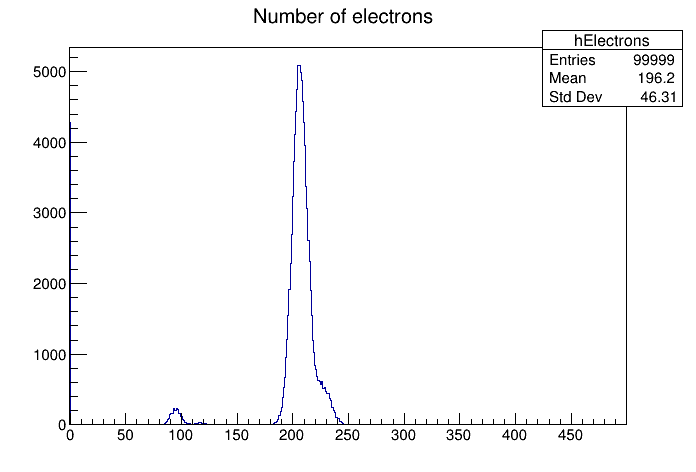

In [16]:
c = ROOT.TCanvas()
hElectrons.Draw("h")
c.Draw()